<img src="https://s3-sa-east-1.amazonaws.com/preditiva.ai/diversos/preditiva_assinatura.jpg">

# Métodos de Ensemble: *Boosting* - Qualidade dos Vinhos

## Importação das bibliotecas

In [1]:
# Módulos de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes de modelagem
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Métricas de Desempenho
import preditiva

## Importação da base de dados

In [2]:
df = pd.read_csv('winequality-red.csv')
df['qualidade'] = np.where(df['quality'] >= 7, 1, 0)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


## Preparação dos Dados

### Missing Values

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
qualidade               0
dtype: int64

### Duplicações

In [4]:
df.duplicated().sum()

240

### Tipos de Variáveis

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qualidade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  qualidade             1599 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 156.3 KB


## Análise Exploratória dos Dados

### Dispersão por Classe

d:\venv\pred_64\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


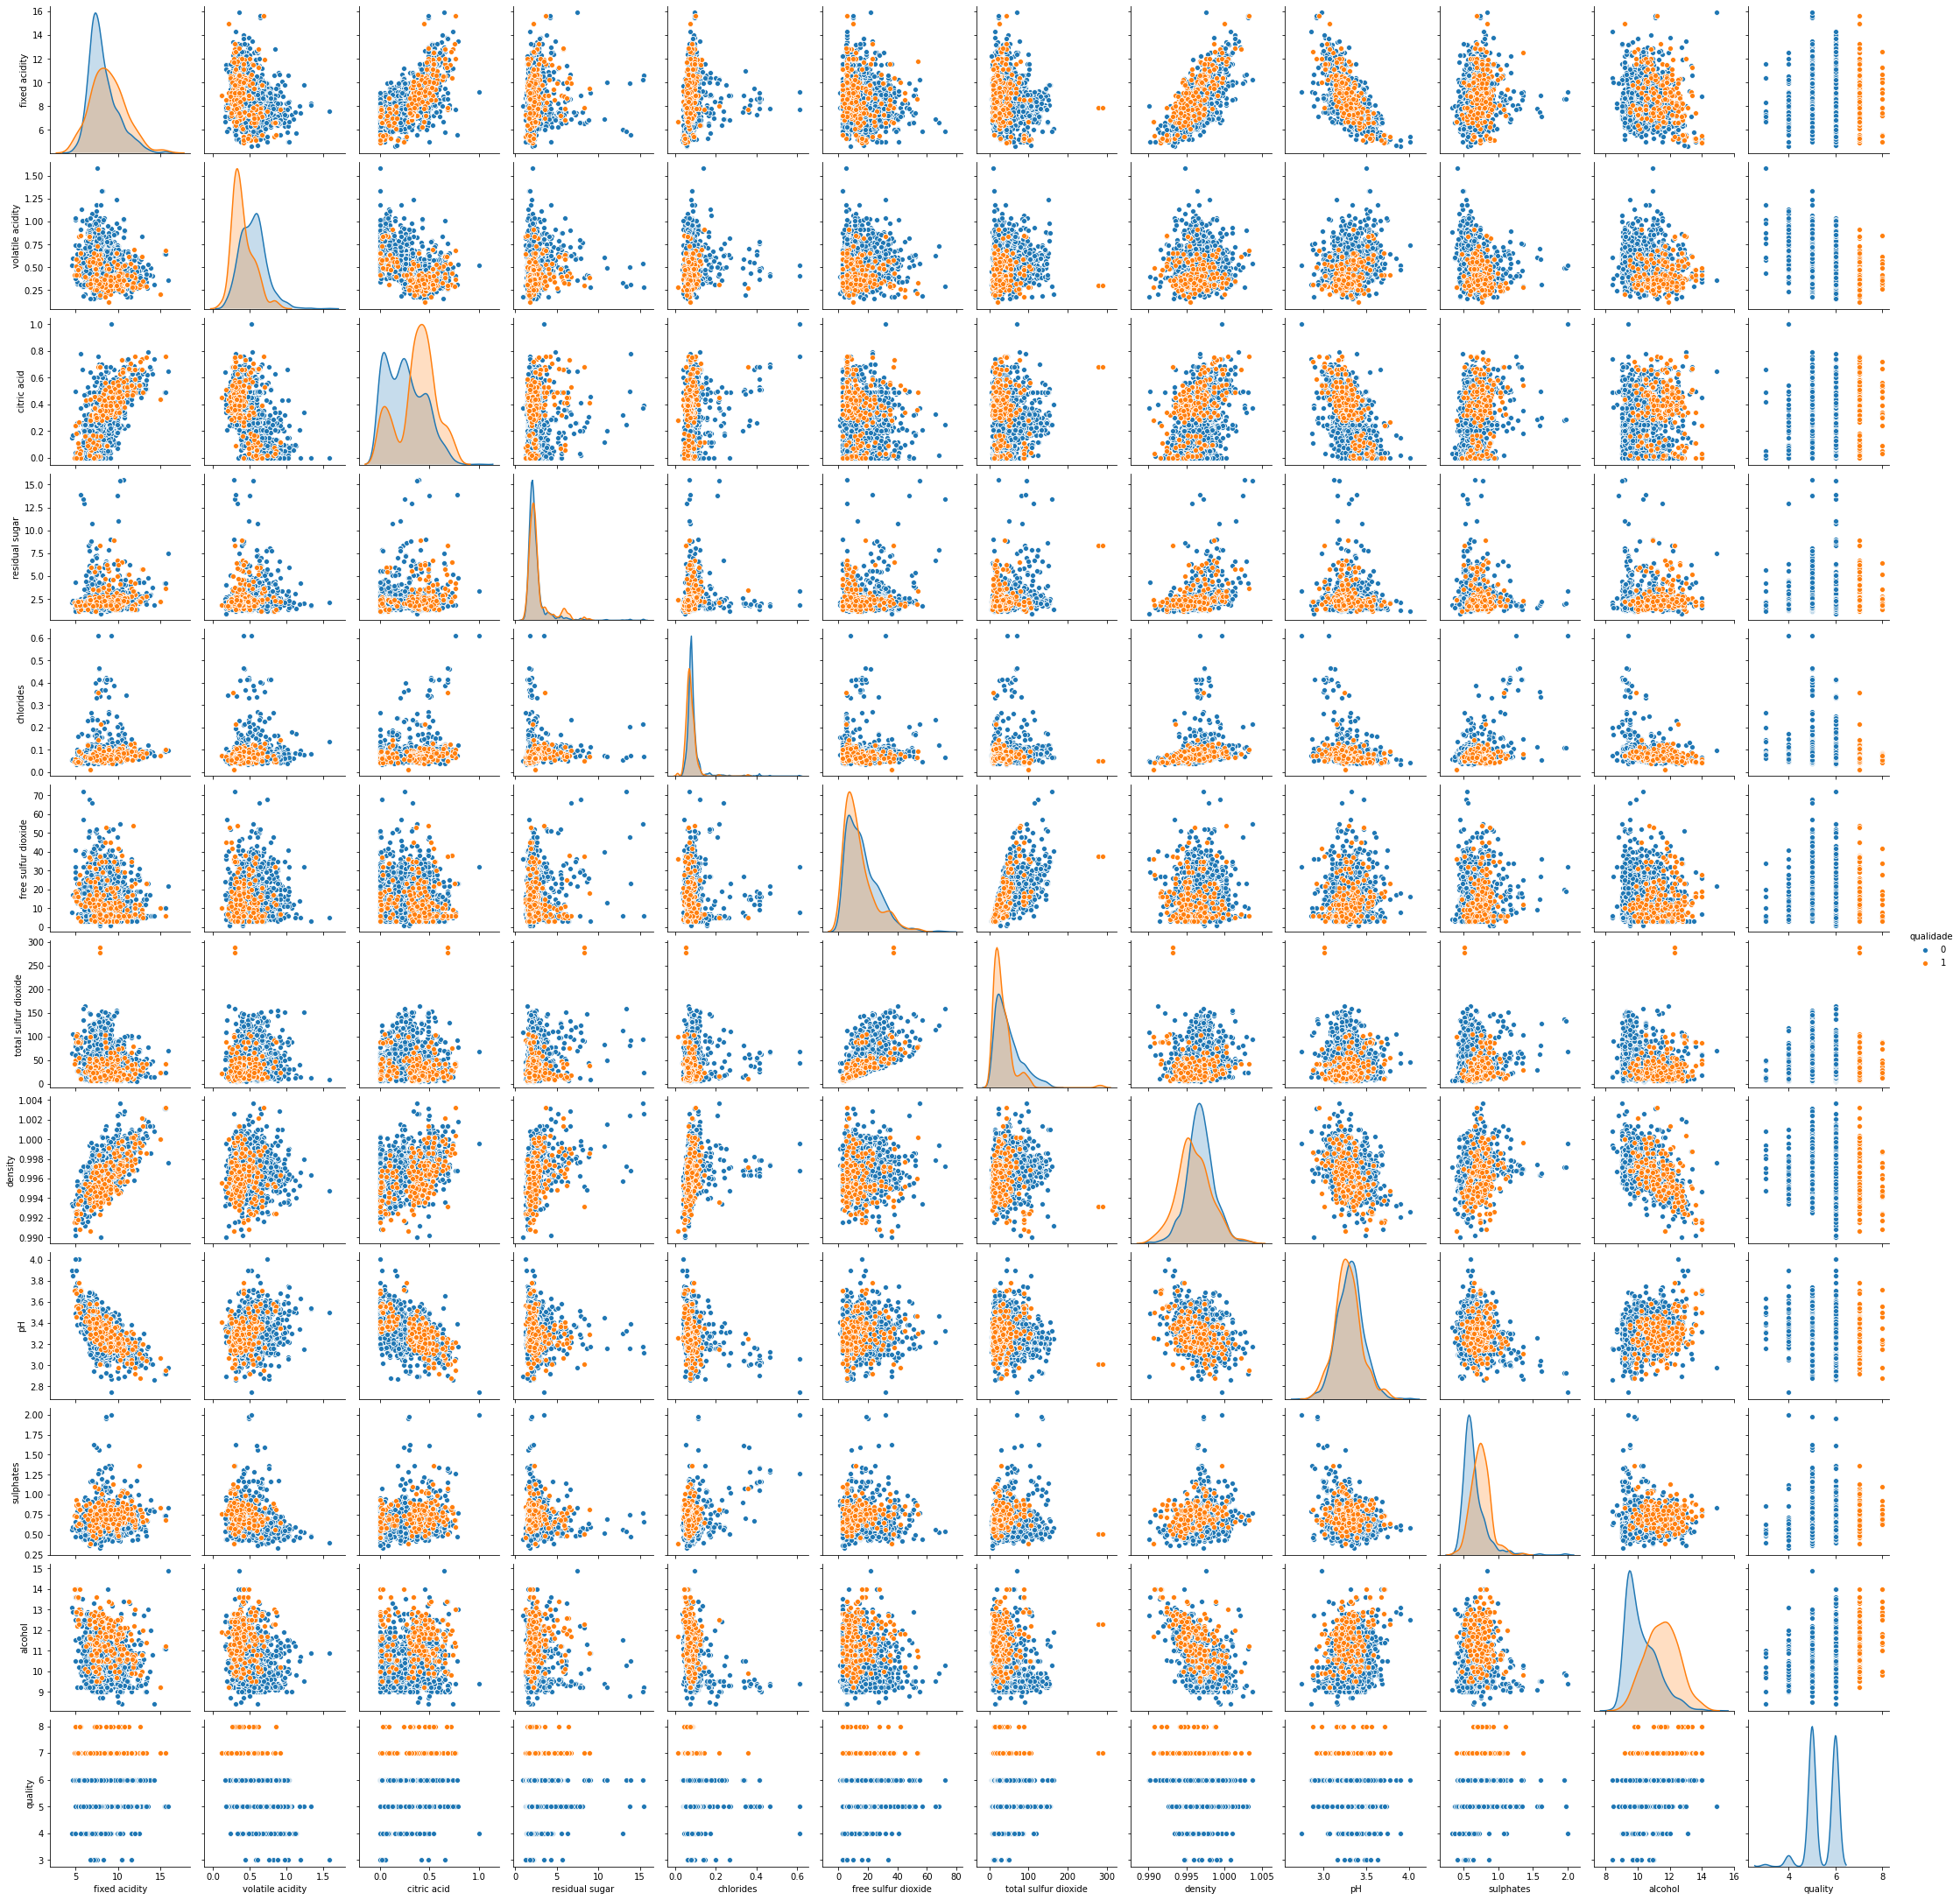

In [7]:
import matplotlib
matplotlib.use('module://ipykernel.pylab.backend_inline')

sns.pairplot(df, hue='qualidade');

### Relatórios Pandas Profiling e SweetViz

In [16]:
perfil_pp, perfil_sv = preditiva.gera_relatorios_aed(df=df,
                                                     target_feat='qualidade')
sns.reset_defaults()

:TARGET::                          |█▌                   | [  7%]   00:00  -> (00:00 left)

:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!
Report base_aed_sv.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


## Desenvolvimento dos Modelos

### Definição do *Target* e das *Features*

In [ ]:
df.head(2)

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'qualidade'],
      dtype='object')

In [9]:
# Target (variável resposta)
y_var = 'qualidade'
y = df[y_var]

# Features (variáveis explicativas)
x_var = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol'
    ]
x = df[x_var]

In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: qualidade, dtype: int32

In [11]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


### Divisão das bases em Treino e Teste

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [13]:
x_train.shape

(1119, 11)

In [14]:
x_test.shape

(480, 11)

### Métodos de Ensemble: *Boosting* - **AdaBoost**

In [23]:
modelo_ada = AdaBoostClassifier(n_estimators=50,
                                learning_rate = 0.6,
                                random_state = 42)

modelo_ada.fit(x_train, y_train)

# Métricas de Desempenho
desemp_ada = preditiva.calcula_desempenho(modelo_ada, 
                                          x_train, y_train,
                                          x_test, y_test)
desemp_ada

,Treino,Teste,Variação
Acurácia,0.913315,0.864583,-0.05
AUROC,0.943244,0.858408,-0.09
KS,0.738700,0.634455,-0.14
Precision,0.762376,0.521739,-0.32
Recall,0.513333,0.358209,-0.30
F1,0.613546,0.424779,-0.31


### Métodos de Ensemble: *Boosting* - **Gradient Boosting**

In [36]:
modelo_gb = GradientBoostingClassifier(n_estimators=100,
                                       learning_rate = 0.4,
                                       subsample=0.2,
                                       min_samples_leaf=10,
                                       max_depth=2,
                                       random_state = 42)

modelo_gb.fit(x_train, y_train)

# Métricas de Desempenho
desemp_gb = preditiva.calcula_desempenho(modelo_gb,
                                         x_train, y_train,
                                         x_test, y_test)
desemp_gb

,Treino,Teste,Variação
Acurácia,0.935657,0.881250,-0.06
AUROC,0.954001,0.835893,-0.12
KS,0.786336,0.575151,-0.27
Precision,0.800000,0.583333,-0.27
Recall,0.693333,0.522388,-0.25
F1,0.742857,0.551181,-0.26


### Comparação dos Modelos

In [37]:
desemp_ada

,Treino,Teste,Variação
Acurácia,0.913315,0.864583,-0.05
AUROC,0.943244,0.858408,-0.09
KS,0.738700,0.634455,-0.14
Precision,0.762376,0.521739,-0.32
Recall,0.513333,0.358209,-0.30
F1,0.613546,0.424779,-0.31


In [38]:
desemp_gb

,Treino,Teste,Variação
Acurácia,0.935657,0.881250,-0.06
AUROC,0.954001,0.835893,-0.12
KS,0.786336,0.575151,-0.27
Precision,0.800000,0.583333,-0.27
Recall,0.693333,0.522388,-0.25
F1,0.742857,0.551181,-0.26


### Importância das Variáveis

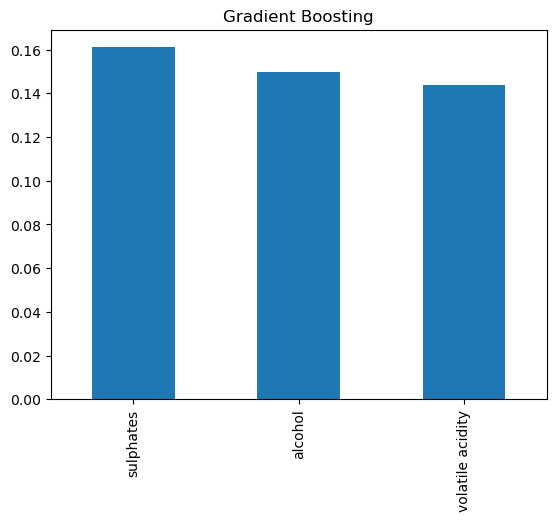

In [40]:
# Importância das variáveis no Gradient Boosting
modelo_gb_feat_importances = pd.Series(modelo_gb.feature_importances_,
                                       index=x.columns)
modelo_gb_feat_importances.nlargest(3).plot(kind='bar', title='Gradient Boosting');